#Libraries and Data

In [10]:
#import libraries
import numpy as np
import pandas as pd
import itertools
from prophet import Prophet
import yfinance
import pickle
from ta import add_all_ta_features
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.stattools import adfuller
from matplotlib.pylab import rcParams
from sklearn import tree
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima


ModuleNotFoundError: No module named 'pmdarima'

In [2]:
#load the data

data = yfinance.download (tickers = "IOC.NS",start="2010-03-06",
                               interval = "1d", group_by = 'ticker', auto_adjust = True)

data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2023-07-10,101.000000,101.449997,97.099998,97.400002,24042759
2023-07-11,97.800003,98.900002,96.900002,98.099998,17508261
2023-07-12,98.250000,99.349998,97.699997,97.900002,14979586
2023-07-13,98.400002,98.699997,96.000000,96.199997,11491737
2023-07-14,96.500000,97.650002,95.800003,96.500000,17975077


#Data preparation

In [3]:
#transform the date variable
data["Date"] = pd.to_datetime(data.index, format = "%m/%d/%Y")


In [4]:
#renaming variables
data["y"] = data["Close"]
data = data.rename(columns = {
                     'Date': 'ds'})
data.head(10)
data = data.reset_index()

In [5]:
print("Length of dataset :",len(data))

Length of dataset : 3299


In [6]:
#create training and test set
test_days = 360 
training_set = data.iloc[:-test_days,:]
test_set = data.iloc[-test_days:,:]

In [7]:
print("Length of Test dataset :", len(test_set),"Length of Training set :",len(training_set))

Length of Test dataset : 360 Length of Training set : 2939


In [8]:
test_set

,Date,Open,High,Low,Close,Volume,ds,y
2939,2022-02-01,78.542124,78.542124,74.490345,75.892883,34627617,2022-02-01,75.892883
2940,2022-02-02,76.360392,77.887605,76.173390,77.575928,14749194,2022-02-02,77.575928
2941,2022-02-03,78.168105,78.448615,77.388915,77.700592,13117138,2022-02-03,77.700592
2942,2022-02-04,77.856429,78.136939,77.108413,77.388916,10723602,2022-02-04,77.388916
2943,2022-02-07,77.607093,77.669427,76.360390,76.609734,13452373,2022-02-07,76.609734
...,...,...,...,...,...,...,...,...
3294,2023-07-10,101.000000,101.449997,97.099998,97.400002,24042759,2023-07-10,97.400002
3295,2023-07-11,97.800003,98.900002,96.900002,98.099998,17508261,2023-07-11,98.099998
3296,2023-07-12,98.250000,99.349998,97.699997,97.900002,14979586,2023-07-12,97.900002
3297,2023-07-13,98.400002,98.699997,96.000000,96.199997,11491737,2023-07-13,96.199997


#Prophet

14:09:25 - cmdstanpy - INFO - Chain [1] start processing
14:09:27 - cmdstanpy - INFO - Chain [1] done processing


Length of forscast: 3299
Length of forscast: 3299 Len of test : 3299


Text(0.5, 1.0, '')

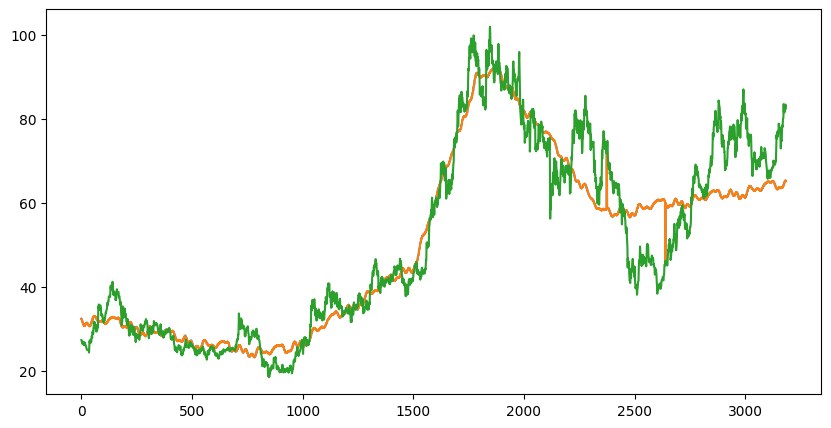

In [9]:
m = Prophet(
            #holidays = holidays,
            #seasonality_mode = 'additive',
            #weekly_seasonality=True,
            #seasonality_prior_scale = 20,
            #yearly_seasonality=True,
            #changepoint_prior_scale = 0.1,
           # holidays_prior_scale = 10
           )
#m.add_regressor('volume_adi')
#m.add_regressor('volume_obv')
#m.add_regressor('volume_cmf')
#m.add_regressor('others_dr')
#m.add_regressor('volume_adi')
m.fit(training_set)

future = pd.DataFrame({"ds" : data.ds})
#forecast
forecast = m.predict(m.make_future_dataframe(periods=test_days))
forecast.tail()
print("Length of forscast:",len(forecast))
print("Length of forscast:",len(forecast),"Len of test :",len(data))
new_df = pd.DataFrame({"forecast" : forecast.yhat,"ds":forecast.ds })
new_df.set_index('ds', inplace=True)

merged_df = pd.merge(new_df, data, on='ds' ,how='inner')

merged_df

# Let us plot now
fig, ax = plt.subplots(figsize=(10,5))
merged_df.forecast.plot(x='param_n_estimators', y='mean_test_score', label='Depth=2', ax=ax)

merged_df.forecast.plot(x='param_n_estimators', y='mean_test_score', label='Depth=2', ax=ax)
merged_df.y.plot(x='param_n_estimators', y='mean_test_score', label='Depth=2', ax=ax)

#training_set.y.plot(x='param_n_estimators', y='mean_test_score', label='Depth=2', ax=ax)

plt.title('')